# Welcome to the Tutorial of python plot

In lesson three, we would like to plot some 3D project polyhedra models.

First, Octahedra -> truncated Octahedra -> Cuboctahedra.

Second, Cubes -> truncated rhombic dodecahedra -> Rhombic dodecahedra.

Above included most understandable morphology related to cubic system.

In [ ]:
# for colab env, ipympl for %matplotlib widget work.
!pip install ipympl
get_ipython().kernel.do_shutdown(restart=True)

In [1]:
# activate "Third-party Jupyter widgets" functios.
from google.colab import output
output.enable_custom_widget_manager()

ModuleNotFoundError: No module named 'google'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import product

In [3]:
# Define canvas parameters.

def plot_config(ax, ptitle):
    # Set the plot limits
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')
    # ax.set_title(f'{ptitle}')
    # ax.set_title(f'Cube with Inner Core & Outer Surface (No Sidewalls)')

    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # make the panes transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

    ax.set_axis_off()

    plt.gca().set_aspect('equal')
    plt.show(block=False)

In [4]:
# Part 1, Octahedra -> truncated Octahedra -> Cuboctahedra.
# Define vertices and faces math function.

def generate_chamfered_octahedra(size, chamfer, output_vertices_only=False):
    # if chamfer < 0.01:
        # chamfer=0.01

    size = float(size)
    shrink = 1-float(chamfer)
    
    Sn = np.round(size*(1-chamfer/2), 6)
    Hn = np.round(size*(chamfer/2), 6)
    
    # gen edge offset vertices
    xz = [(i, 0, k) for i, k in product((Sn, -Sn), (Hn, -Hn))]
    zx = [(k, 0, i) for i, k in product((Sn, -Sn), (Hn, -Hn))]
    xy = [(i, j, 0) for i, j in product((Sn, -Sn), (Hn, -Hn))]
    yx = [(j, i, 0) for i, j in product((Sn, -Sn), (Hn, -Hn))]
    yz = [(0, j, k) for j, k in product((Sn, -Sn), (Hn, -Hn))]
    zy = [(0, k, j) for j, k in product((Sn, -Sn), (Hn, -Hn))]

    vertices = xz + zx + xy + yx + yz + zy

    square_faces = [
        [vertices[i] for i in [ 0,  8,  1,  9]],
        [vertices[i] for i in [ 2, 10,  3, 11]],
        [vertices[i] for i in [ 4, 20,  5, 21]],
        [vertices[i] for i in [ 6, 22,  7, 23]],
        [vertices[i] for i in [12, 16, 13, 17]],
        [vertices[i] for i in [14, 18, 15, 19]]]
    Hexagon_faces = [
        [vertices[i] for i in [ 0,  4, 20, 16, 12,  8]],
        [vertices[i] for i in [ 8, 12, 17, 22,  6,  1]],
        [vertices[i] for i in [ 2,  5, 20, 16, 13, 10]],
        [vertices[i] for i in [10, 13, 17, 22,  7,  3]],
        [vertices[i] for i in [ 0,  4, 21, 18, 14,  9]],
        [vertices[i] for i in [ 9, 14, 19, 23,  6,  1]],
        [vertices[i] for i in [ 2,  5, 21, 18, 15, 11]],
        [vertices[i] for i in [11, 15, 19, 23,  7,  3]]]

    if output_vertices_only:
        return(vertices)
    else:
        return(square_faces, Hexagon_faces)



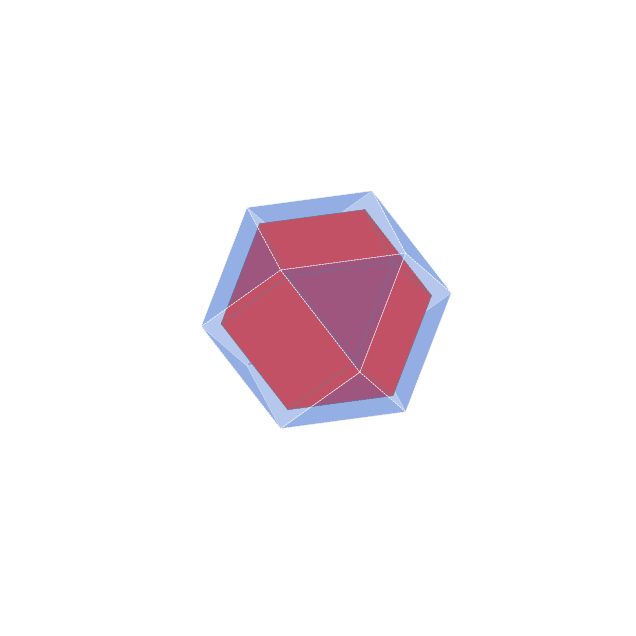

In [7]:
# Part 1, Octahedra -> truncated Octahedra -> Cuboctahedra.
# Define plot configs.
%matplotlib inline

# Define the cube sizes
outer_faces = generate_chamfered_octahedra(size=2.00, chamfer=1)   # Outer cube (Full size)
inner_faces = generate_chamfered_octahedra(size=1.68, chamfer=1)   # Inner cube (Shrunk)

# Define colors (with transparency)
inner_color    = (0.9, 0.3, 0.3, 1.0)  # Red, semi-transparent
outer_color_sf = (0.2, 0.4, 0.8, 0.2)  # Blue, semi-transparent, square
outer_color_hf = (0.2, 0.4, 0.8, 0.4)  # Blue, semi-transparent, hexagon

heated_color_sf = (0.5, 0.3, 0.5, 0.2)
heated_color_hf = (0.5, 0.3, 0.5, 0.4)

# Plot the cube
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('ortho') 

for face in inner_faces:
    for f in face:
        poly = Poly3DCollection([f], facecolors=inner_color, edgecolors='grey', linewidths=0.5, linestyle='--')
        ax.add_collection3d(poly)

for sf in outer_faces[0]:
    poly = Poly3DCollection([sf], facecolors=outer_color_sf, edgecolors='white', linewidths=0.4, linestyle='--')
    ax.add_collection3d(poly)

for hf in outer_faces[1]:
    poly = Poly3DCollection([hf], facecolors=outer_color_hf, edgecolors='white', linewidths=0.4, linestyle='--')
    ax.add_collection3d(poly)

plot_config(ax, 'test')

In [8]:
# Part 2, Cubes -> truncated rhombic dodecahedra -> Rhombic dodecahedra.
# Define vertices and faces math function.

def generate_chamfered_cube(size, chamfer, output_vertices_only=False):
    # if chamfer < 0.01:
        # chamfer=0.01

    size = float(size)
    shrink = 1-float(chamfer)
    
    Sn = np.round(size*(1-chamfer/2), 6)
    Hn = np.round(size*shrink, 6)

    # gen origin offset vertices
    square_vertices = [(i, j, k) for i, j, k in product((Sn, -Sn), repeat=3)]
    
    # gen edge offset vertices
    hexa_z = [(i, j, k) for i, j, k in product((Hn, -Hn), (Hn, -Hn), (size, -size))]
    hexa_y = [(i, k, j) for i, j, k in product((Hn, -Hn), (Hn, -Hn), (size, -size))]
    hexa_x = [(k, j, i) for i, j, k in product((Hn, -Hn), (Hn, -Hn), (size, -size))]
    hexa_vertices = hexa_x + hexa_y + hexa_z

    vertices = square_vertices + hexa_vertices
    
    square_faces = [
        [vertices[i] for i in [ 8, 12, 14, 10]],
        [vertices[i] for i in [ 9, 13, 15, 11]],
        [vertices[i] for i in [16, 18, 22, 20]],
        [vertices[i] for i in [17, 19, 23, 21]],
        [vertices[i] for i in [24, 26, 30, 28]],
        [vertices[i] for i in [25, 27, 31, 29]]]
    Hexagon_faces = [
        [vertices[i] for i in [0,  8, 12, 1, 18, 16]],
        [vertices[i] for i in [2, 10, 14, 3, 19, 17]],
        [vertices[i] for i in [4,  9, 13, 5, 22, 20]],
        [vertices[i] for i in [6, 11, 15, 7, 23, 21]],
        [vertices[i] for i in [0, 16, 20, 4, 28, 24]],
        [vertices[i] for i in [1, 18, 22, 5, 29, 25]],
        [vertices[i] for i in [2, 17, 21, 6, 30, 26]],
        [vertices[i] for i in [3, 19, 23, 7, 31, 27]],
        [vertices[i] for i in [0,  8, 10, 2, 26, 24]],
        [vertices[i] for i in [1, 12, 14, 3, 27, 25]],
        [vertices[i] for i in [4,  9, 11, 6, 30, 28]],
        [vertices[i] for i in [5, 13, 15, 7, 31, 29]]]
    if output_vertices_only:
        return(vertices)
    else:
        return(square_faces, Hexagon_faces)

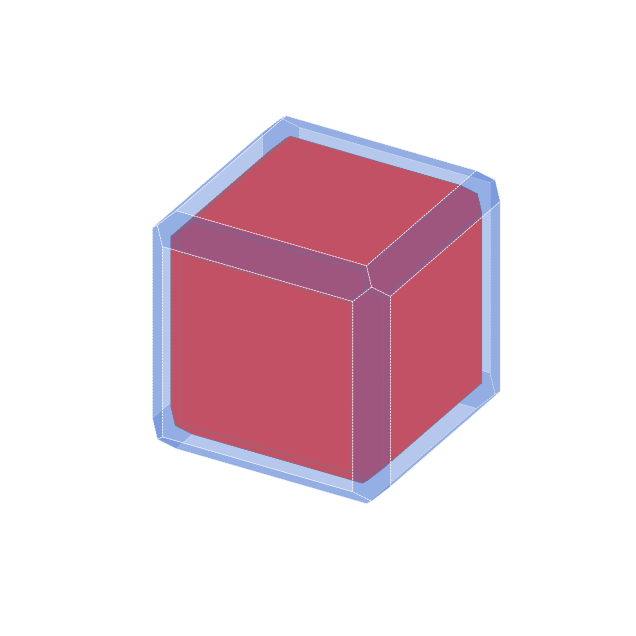

In [14]:
# Define the cube sizes
outer_faces = generate_chamfered_cube(size=1.50, chamfer=0.2)   # Outer cube (Full size)
inner_faces = generate_chamfered_cube(size=1.34, chamfer=0.2)   # Inner cube (Shrunk)

# Define colors (with transparency)
inner_color    = (0.9, 0.3, 0.3, 1.0)  # Red, semi-transparent
outer_color_sf = (0.2, 0.4, 0.8, 0.2)  # Blue, semi-transparent, square
outer_color_hf = (0.2, 0.4, 0.8, 0.4)  # Blue, semi-transparent, hexagon

heated_color_sf = (0.5, 0.3, 0.5, 0.2)
heated_color_hf = (0.5, 0.3, 0.5, 0.4)

# Plot the cube
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('ortho') 

for face in inner_faces:
    for f in face:
        poly = Poly3DCollection([f], facecolors=inner_color, edgecolors='grey', linewidths=0.5, linestyle='--')
        ax.add_collection3d(poly)

for sf in outer_faces[0]:
    poly = Poly3DCollection([sf], facecolors=outer_color_sf, edgecolors='white', linewidths=0.4, linestyle='--')
    ax.add_collection3d(poly)

for hf in outer_faces[1]:
    poly = Poly3DCollection([hf], facecolors=outer_color_hf, edgecolors='white', linewidths=0.4, linestyle='--')
    ax.add_collection3d(poly)

plot_config(ax, 'test')